<a href="https://colab.research.google.com/github/laksh262001/Miniproject/blob/main/MINI_PROJECT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import os
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import load_img, img_to_array

# array_to_image use code image.array_to_img ^^^^TADA

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout

# tenserboard to visualise whats happening

# from tensorflow.keras.callbacks import TensorBoard
from time import strftime

# other libraries

from IPython.display import display
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from numpy.random import seed
seed(888)
import tensorflow as tf
tf.random.set_seed(404)




# Constants

In [ ]:
LOG_DIR = 'tensorboard_cifar_logstt/'

LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS
NR_CLASSES = 10

VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000

In [ ]:
LABEL_NAMES[(6)]

'Frog'

# Get Data

In [ ]:
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


# PlotData

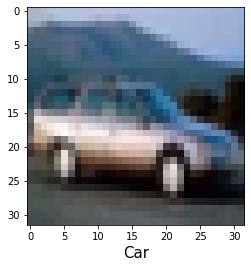

In [ ]:
plt.imshow(x_train_all[4])
plt.xlabel(LABEL_NAMES[y_train_all[4][0]], fontsize=15)
plt.show()

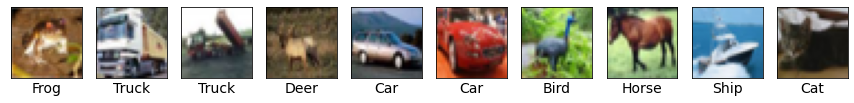

In [ ]:
plt.figure(figsize=(15,5))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize=14)
    plt.imshow(x_train_all[i])

# Preprocess Data

In [ ]:
x_train_all, x_test = x_train_all / 255.0, x_test / 255.0

In [ ]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)

In [ ]:
x_test = x_test.reshape(len(x_test), TOTAL_INPUTS)
print(f'Shape of x_test is {x_test.shape}')

Shape of x_test is (10000, 3072)


# Create Validation Dataset

In [ ]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]
x_val.shape

(10000, 3072)

In [ ]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]
x_train.shape

(40000, 3072)

In [ ]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]

# Define the Neural Network using keras

In [ ]:
32*32*3

3072

In [ ]:
model_1 = Sequential([
    Dense(units=128, input_dim=TOTAL_INPUTS, activation='relu', name='m1_hidden1'),
    Dense(units=64, activation='relu', name='m1_hidden2'),
    Dense(16, activation='relu', name='m1_hidden3'),
    Dense(10, activation='softmax', name='m1_output')
])
model_1.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [ ]:
model_2 =Sequential([
    Dropout(0.2,seed=42,input_shape =(TOTAL_INPUTS,)),
    Dense(128, activation='relu', name='m1_hidden1'),
    Dense(64, activation='relu', name='m1_hidden2'),
    Dense(16, activation='relu', name='m1_hidden3'),
    Dense(10, activation='softmax', name='m1_output')
])

model_2.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [ ]:
model_3=Sequential([
                    Dropout(0.25,seed=42,input_shape=(TOTAL_INPUTS,)),
                    Dense(300,activation='relu'),
                    Dropout(0.2,seed=42),
                    Dense(250,activation='relu'),
                    Dense(150,activation='relu'),
                    Dense(10,activation='softmax')

])

model_3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_4=Sequential([
                    Dropout(0.25,seed=42,input_shape=(TOTAL_INPUTS,)),
                    Dense(300,activation='relu'),
                    Dropout(0.2,seed=42),
                    Dense(250,activation='relu'),
                    Dense(150,activation='relu'),
                    Dense(10,activation='softmax')
])
model_4.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3))

# Fit the model

In [ ]:
%%time
samples_per_batch = 50000
nr_epochs = 300
model_4.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs, validation_data=(x_val, y_val))

Epoch 1/300
1/1 [==============================] - 5s 5s/step - loss: 1.1661 - accuracy: 0.5798 - val_loss: 1.3154 - val_accuracy: 0.5346
Epoch 2/300
1/1 [==============================] - 5s 5s/step - loss: 1.1614 - accuracy: 0.5827 - val_loss: 1.3149 - val_accuracy: 0.5341
Epoch 3/300
1/1 [==============================] - 5s 5s/step - loss: 1.1620 - accuracy: 0.5821 - val_loss: 1.3144 - val_accuracy: 0.5335
Epoch 4/300
1/1 [==============================] - 5s 5s/step - loss: 1.1607 - accuracy: 0.5815 - val_loss: 1.3137 - val_accuracy: 0.5337
Epoch 5/300
1/1 [==============================] - 4s 4s/step - loss: 1.1627 - accuracy: 0.5809 - val_loss: 1.3139 - val_accuracy: 0.5334
Epoch 6/300
1/1 [==============================] - 4s 4s/step - loss: 1.1591 - accuracy: 0.5863 - val_loss: 1.3149 - val_accuracy: 0.5333
Epoch 7/300
1/1 [==============================] - 4s 4s/step - loss: 1.1589 - accuracy: 0.5855 - val_loss: 1.3156 - val_accuracy: 0.5341
Epoch 8/300
1/1 [=================

In [ ]:

# %%time
# samples_per_batch = 1000
# nr_epochs = 100
# model_2.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs, validation_data=(x_val, y_val))

In [ ]:
# %%time
# samples_per_batch = 1000
# nr_epochs = 100
# model_1.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs, validation_data=(x_val, y_val))

In [ ]:
# %%time
# nr_epochs = 150
# model_1.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch, epochs=nr_epochs, validation_data=(x_val, y_val))

In [ ]:
# nr_epochs = 10
# model_3.fit(x_train, y_train, batch_size=1000,validation_split=0.15, epochs=nr_epochs, validation_data=(x_val, y_val))

# Predicition


In [ ]:
x_val[0]

array([0.23137255, 0.24313725, 0.24705882, ..., 0.48235294, 0.36078431,
       0.28235294])

In [ ]:
 test = np.expand_dims(x_val[0],axis=0)
 test.shape

(1, 3072)

In [ ]:
np.set_printoptions(precision=3)

In [ ]:
model_1.predict(test)

array([[0.082, 0.094, 0.085, 0.048, 0.097, 0.132, 0.073, 0.132, 0.09 ,
        0.167]], dtype=float32)

In [ ]:
model_1.predict(x_val).shape

(10000, 10)

In [ ]:
predictions = (model_2.predict(test)>0.5).astype("uint")
print(predictions)

[[0 0 0 0 0 0 0 0 0 0]]


In [ ]:
y_val[0]

array([6], dtype=uint8)

In [ ]:
result=0
for i in range(0,10):
  test = np.expand_dims(x_val[i],axis=0)
  predictions = (model_4.predict(test)>0.4).astype('uint')
  print(LABEL_NAMES[y_train_all[i][0]])
  print(predictions)
  if predictions[0][i]==1:
    result=i
  print("Predicted category is "+ LABEL_NAMES[y_train_all[result][0]])
  print("_____________________________________________________________")
  

Frog
[[0 0 0 0 0 0 1 0 0 0]]
Predicted category is Frog
_____________________________________________________________
Truck
[[0 1 0 0 0 0 0 0 0 0]]
Predicted category is Truck
_____________________________________________________________
Truck
[[0 0 0 0 0 0 0 0 0 1]]
Predicted category is Truck
_____________________________________________________________
Deer
[[0 0 0 0 0 0 1 0 0 0]]
Predicted category is Truck
_____________________________________________________________
Car
[[0 1 0 0 0 0 0 0 0 0]]
Predicted category is Truck
_____________________________________________________________
Car
[[0 0 0 0 0 0 0 0 0 0]]
Predicted category is Truck
_____________________________________________________________
Bird
[[0 0 1 0 0 0 0 0 0 0]]
Predicted category is Truck
_____________________________________________________________
Horse
[[0 0 0 0 0 0 0 1 0 0]]
Predicted category is Horse
_____________________________________________________________
Ship
[[0 0 0 0 0 0 0 0 1 0]]
Predicted category 

#Image Provided 

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
8
Ship

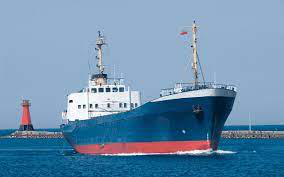

In [ ]:
FILE_1 = '/content/bird.jpeg'
FILE_2 = '/content/car.jpeg'
FILE_3 = '/content/frog.jpeg'
FILE_4 = '/content/deer.jpeg'
FILE_5 = '/content/horse.jpeg'
FILE_6 = '/content/ship.jpeg'
FILE_7 = '/content/truck.jpeg'
pic = load_img(FILE_6, target_size=(32, 32))
pic_array = img_to_array(pic)

# display(pic)

pic_array.shape
expanded = np.expand_dims(pic_array, axis=0)
expanded = expanded.reshape(32*32*3)
expanded.shape

test = np.expand_dims(expanded,axis=0)
test.shape

predictions = (model_4.predict(test)>0.5).astype("uint")
for i in range(0,10):
 if predictions[0][i]==1:
    # data = LABEL_NAMES[y_train_all[i][0]]
    predictions = (model_4.predict(test))
    print(predictions)
    result=i
print(result)
# display(y_train_all[result][0])
# print(predictions)
# print(data)
# print("Predicted category is "+ LABEL_NAMES[y_train_all[result][0]],end="\n\n")
for i in range(0,4):
  print(LABEL_NAMES[result][i],end="")

# output image size change
pic_original=load_img(FILE_6)
display(pic_original)

In [ ]:
LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Server Upload


In [ ]:
!pip install anvil-uplink

In [ ]:
import anvil.server

anvil.server.connect("A5TCUYHHPJVG3M5WVCEUFCC7-5LUWM2OJZKMKVYH3")

In [ ]:
import anvil.server

anvil.server.connect("A5TCUYHHPJVG3M5WVCEUFCC7-5LUWM2OJZKMKVYH3")

@anvil.server.callable
def say_hello(name):
  print("Hello from the uplink, %s!" % name)

anvil.server.wait_forever()